# FORECASTING EXCHANGE RATES USING TIME SERIES ANALYSIS

In [1]:
# importing the libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

In [2]:
# load the dataset
data = pd.read_csv('exchange_rate.csv', header=0, index_col=0, parse_dates=True)
data

,Ex_rate
date,
1990-01-01,0.785500
1990-02-01,0.781800
1990-03-01,0.786700
1990-04-01,0.786000
1990-05-01,0.784900
...,...
2010-06-10,0.718494
2010-07-10,0.721839
2010-08-10,0.723197


In [3]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7588 entries, 1990-01-01 to 2010-10-10
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ex_rate  7588 non-null   float64
dtypes: float64(1)
memory usage: 118.6 KB


In [4]:
# checking any null values
data.isnull().sum()

Ex_rate    0
dtype: int64

In [5]:
# Checking any dulpicated values
data.duplicated().sum()

2258

In [6]:
# we need to drop the duplicated values
data.drop_duplicates(inplace=True)

In [7]:
data.duplicated().sum()

0

# Visualize the data

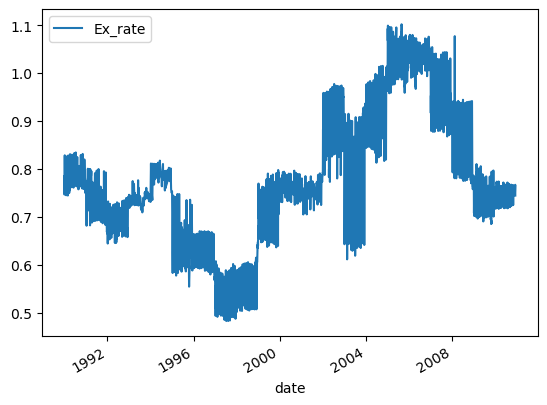

In [8]:
# line plot of exchange rate
data.plot()
plt.show()

array([[<Axes: title={'center': 'Ex_rate'}>]], dtype=object)

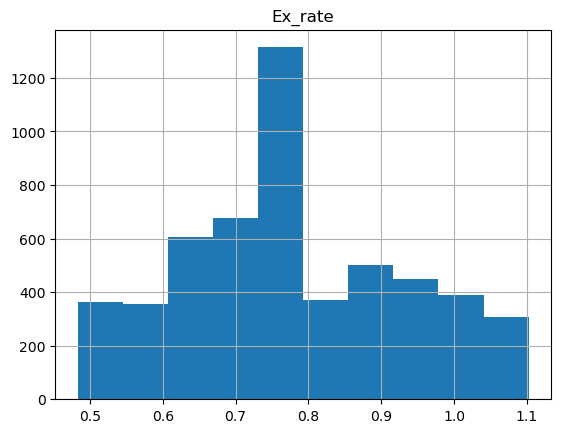

In [9]:
# create histogram
data.hist()

<Axes: ylabel='Density'>

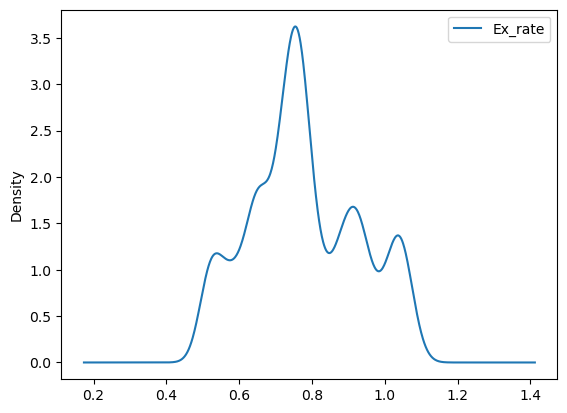

In [10]:
# distribution plot
data.plot(kind='kde')

# Split the data

In [11]:
data.shape

(5330, 1)

# ARIMA Hyperparameters

In [12]:
import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
#Splitting 
from sklearn.model_selection import train_test_split

In [13]:
!pip install --upgrade statsmodels

In [14]:
from statsmodels.tsa.arima.model import ARIMA
#Splitting Data
train_size = int(len(data) * 0.8)
train_data, test_data = data.iloc[:train_size], data.iloc[train_size:]

#Model Selection (ARIMA)
# ARIMA(p,d,q) model selection
p = 5  # Autoregressive (AR) order
d = 1  # Differencing order
q = 0  # Moving Average (MA) order

# Model Training
arima_model = ARIMA(train_data, order=(p, d, q))
arima_result = arima_model.fit()

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packa

In [15]:
# Generate forecasts for future exchange rates
arima_forecast = arima_result.forecast(steps=len(test_data))

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [16]:
print(arima_forecast)

4264    1.021009
4265    1.020808
4266    1.020844
4267    1.020872
4268    1.020841
          ...   
5325    1.020844
5326    1.020844
5327    1.020844
5328    1.020844
5329    1.020844
Name: predicted_mean, Length: 1066, dtype: float64


In [17]:
print(arima_forecast.mean())

1.0208441689528778


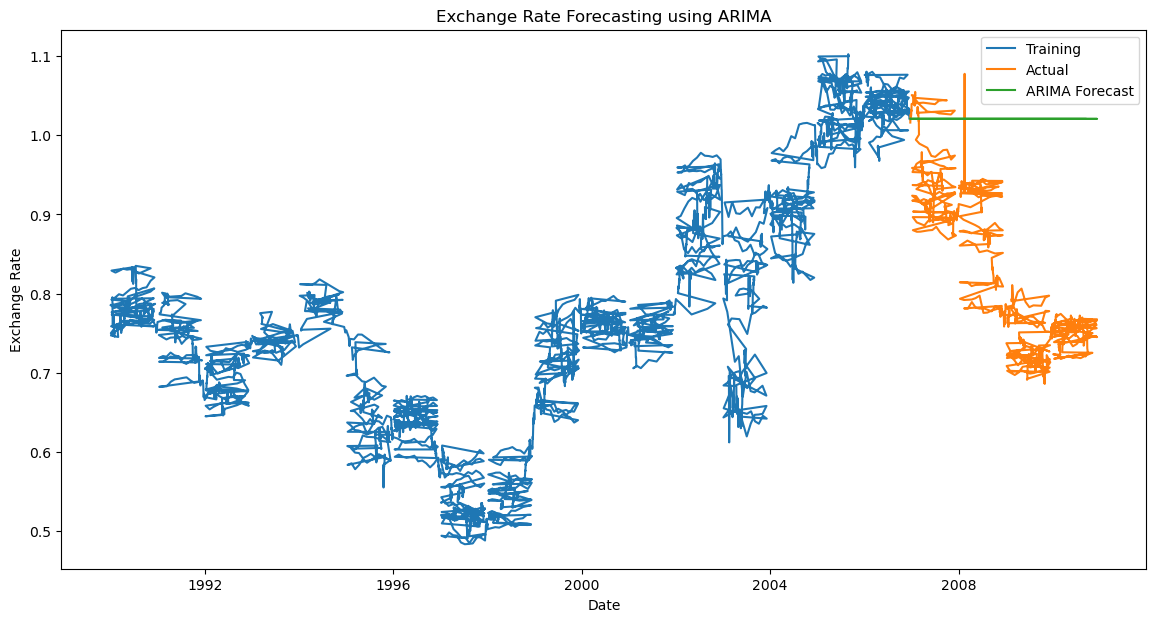

In [18]:
# Visualization
plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data, label='Training')
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, arima_forecast, label='ARIMA Forecast')
plt.title('Exchange Rate Forecasting using ARIMA')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

# Exponetial Smoothing

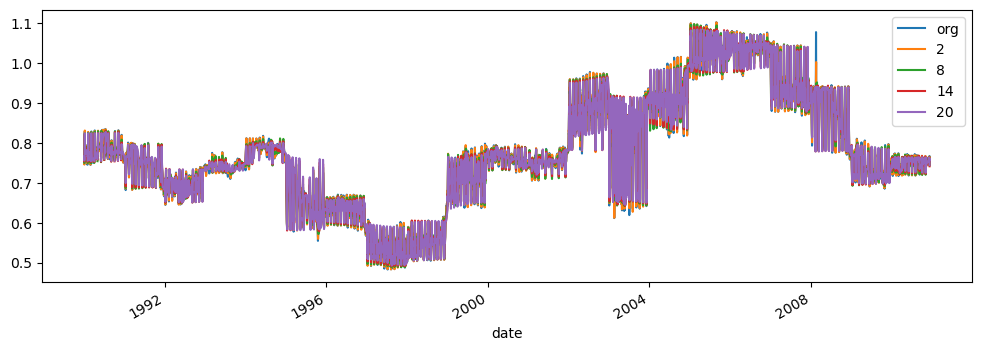

In [19]:
# Moving average
plt.figure(figsize=(12,4))
data.Ex_rate.plot(label="org")
for i in range(2,24,6):
    data['Ex_rate'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

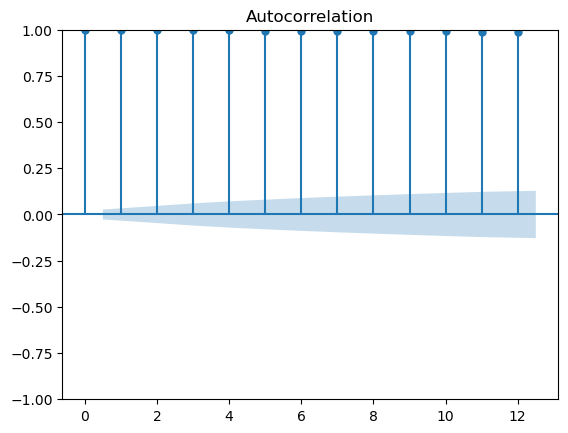

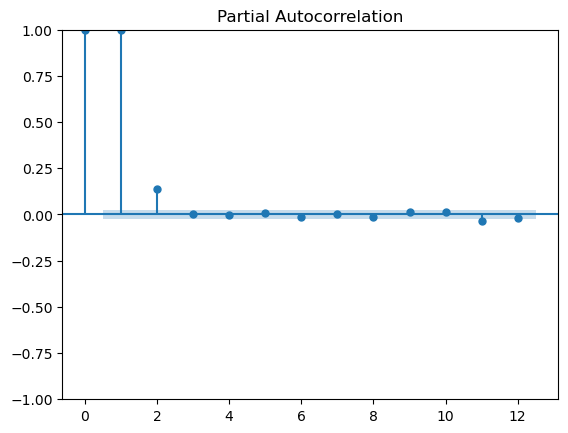

In [20]:
# ACF plots and PACF plots
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data['Ex_rate'],lags=12)
tsa_plots.plot_pacf(data['Ex_rate'],lags=12)
plt.show()

In [21]:
# Exponential Smoothing model training
exp_model = ExponentialSmoothing(train_data)
exp_result = exp_model.fit()

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [22]:
exp_forecast = exp_result.forecast(steps=len(test_data))

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [23]:
# print the forecast
print(exp_forecast)

4264    1.020925
4265    1.020925
4266    1.020925
4267    1.020925
4268    1.020925
          ...   
5325    1.020925
5326    1.020925
5327    1.020925
5328    1.020925
5329    1.020925
Length: 1066, dtype: float64


In [24]:
print(exp_forecast.mean())

1.020924945577067


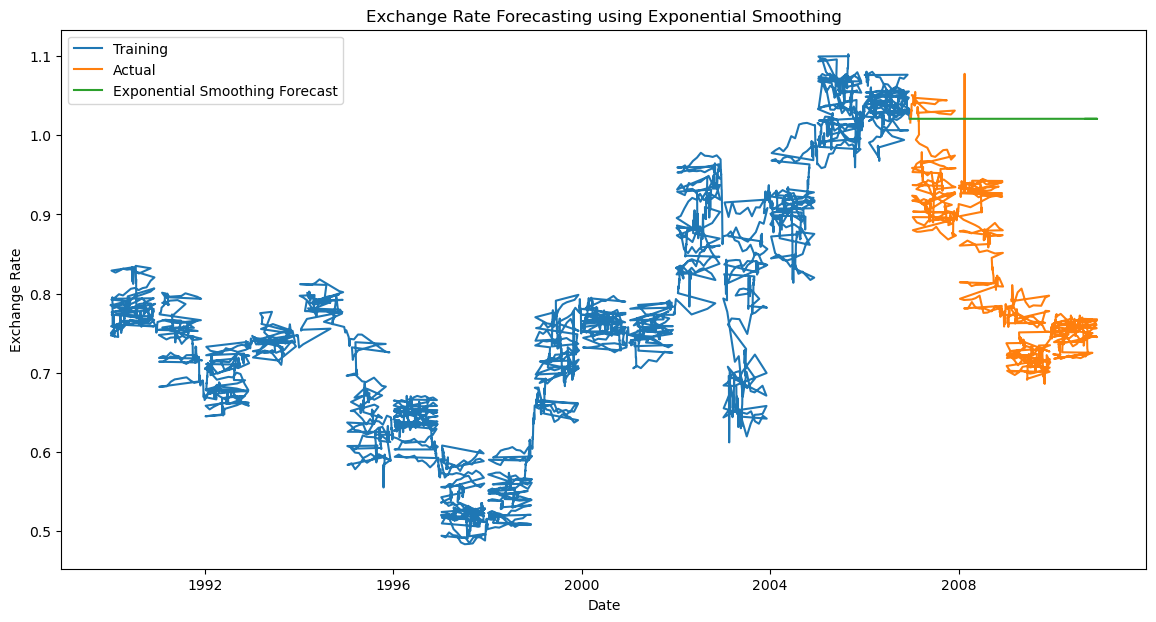

In [25]:
# Visualize the exponential smoothing model
plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data, label='Training')
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, exp_forecast, label='Exponential Smoothing Forecast')
plt.title('Exchange Rate Forecasting using Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

# Simple exponential Method

In [26]:
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import matplotlib.pyplot as plt

# fit the data on model

ses_model = SimpleExpSmoothing(train_data)
ses_result = ses_model.fit()
# forecast
ses_forecast = ses_result.forecast(steps=len(test_data))
print(ses_forecast)

4264    1.020921
4265    1.020921
4266    1.020921
4267    1.020921
4268    1.020921
          ...   
5325    1.020921
5326    1.020921
5327    1.020921
5328    1.020921
5329    1.020921
Length: 1066, dtype: float64


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [27]:
print(ses_forecast.mean())

1.020920643280754


# Holt method

In [28]:
# Model Training (Holt)
holt_model = Holt(train_data)
holt_result = holt_model.fit()

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [29]:
holt_forecast = holt_result.forecast(steps=len(test_data))

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [30]:
print(holt_forecast)

4264    1.020738
4265    1.020562
4266    1.020387
4267    1.020212
4268    1.020036
          ...   
5325    0.834719
5326    0.834543
5327    0.834368
5328    0.834193
5329    0.834017
Length: 1066, dtype: float64


In [31]:
print(holt_forecast.mean())

0.9273773994111016


## holt-winter

In [32]:
# Model Training (Holt-Winters)

holt_winters_model = ExponentialSmoothing(train_data, seasonal_periods=12, trend='add', seasonal='add')
holt_winters_result = holt_winters_model.fit()

# Forecasting
# Generate forecasts for future exchange rates
holt_winters_forecast = holt_winters_result.forecast(steps=len(test_data))
print(holt_winters_forecast)

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


4264    1.020840
4265    1.020815
4266    1.021010
4267    1.020680
4268    1.020894
          ...   
5325    1.076132
5326    1.076190
5327    1.075357
5328    1.075531
5329    1.075964
Length: 1066, dtype: float64


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [33]:
print(holt_winters_forecast.mean())

1.0484469914941892


# Compare the ARIMA and exponential smoothing model

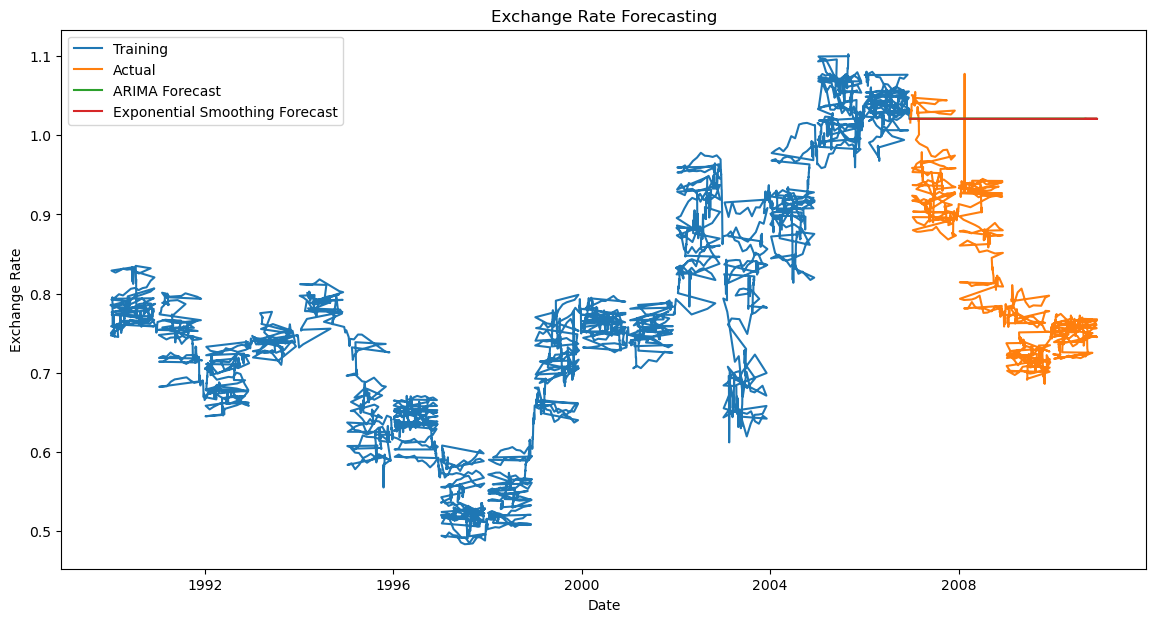

In [34]:
# Visualization
plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data, label='Training')
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, arima_forecast, label='ARIMA Forecast')
plt.plot(test_data.index, exp_forecast, label='Exponential Smoothing Forecast')
plt.title('Exchange Rate Forecasting')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

## Based on these models prediction mean values, we can make the following conclusions:

### ARIMA Model:
1.0208441689527683

### exp_smoothing

1.020924945600147

### Simple Exponential Smoothing (SES) Model:
1.0209206433396076

### Holt Model:
0.9273773985233889

### Holt-Winters Model:   
1.048453922764522



## Here all models are predict different forecast on exchange rates